<a href="https://colab.research.google.com/github/lakhbir-05/Teen-Smartphone-Usage-and-Addiction-Impact/blob/main/teen_smartphone_usage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

In [ ]:
# Step 1: Upload Kaggle API key
from google.colab import files
files.upload()  # Upload kaggle.json

# Step 2: Configure Kaggle credentials
!mkdir -p ~/.kaggle
!mv kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 3: Download the dataset
!kaggle datasets download -d sumedh1507/teen-phone-addiction

# Step 4: Unzip the data
!unzip teen-phone-addiction.zip


Saving kaggle.json to kaggle.json
Dataset URL: https://www.kaggle.com/datasets/sumedh1507/teen-phone-addiction
License(s): CC0-1.0
  0% 0.00/119k [00:00<?, ?B/s]
100% 119k/119k [00:00<00:00, 221MB/s]
Archive:  teen-phone-addiction.zip
  inflating: teen_phone_addiction_dataset.csv  


In [ ]:
import pandas as pd
df= pd.read_csv('/content/teen_phone_addiction_dataset.csv')
df.columns

Index(['ID', 'Name', 'Age', 'Gender', 'Location', 'School_Grade',
       'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance',
       'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level',
       'Depression_Level', 'Self_Esteem', 'Parental_Control',
       'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily',
       'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education',
       'Phone_Usage_Purpose', 'Family_Communication', 'Weekend_Usage_Hours',
       'Addiction_Level'],
      dtype='object')

In [ ]:
df.head()

,ID,Name,Age,Gender,Location,School_Grade,Daily_Usage_Hours,Sleep_Hours,Academic_Performance,Social_Interactions,...,Screen_Time_Before_Bed,Phone_Checks_Per_Day,Apps_Used_Daily,Time_on_Social_Media,Time_on_Gaming,Time_on_Education,Phone_Usage_Purpose,Family_Communication,Weekend_Usage_Hours,Addiction_Level
0,1,Shannon Francis,13,Female,Hansonfort,9th,4.0,6.1,78,5,...,1.4,86,19,3.6,1.7,1.2,Browsing,4,8.7,10.0
1,2,Scott Rodriguez,17,Female,Theodorefort,7th,5.5,6.5,70,5,...,0.9,96,9,1.1,4.0,1.8,Browsing,2,5.3,10.0
2,3,Adrian Knox,13,Other,Lindseystad,11th,5.8,5.5,93,8,...,0.5,137,8,0.3,1.5,0.4,Education,6,5.7,9.2
3,4,Brittany Hamilton,18,Female,West Anthony,12th,3.1,3.9,78,8,...,1.4,128,7,3.1,1.6,0.8,Social Media,8,3.0,9.8
4,5,Steven Smith,14,Other,Port Lindsaystad,9th,2.5,6.7,56,4,...,1.0,96,20,2.6,0.9,1.1,Gaming,10,3.7,8.6


                ID          Age  Daily_Usage_Hours  Sleep_Hours  \
count  3000.000000  3000.000000        3000.000000  3000.000000   
mean   1500.500000    15.969667           5.020667     6.489767   
std     866.169729     1.989489           1.956501     1.490713   
min       1.000000    13.000000           0.000000     3.000000   
25%     750.750000    14.000000           3.700000     5.500000   
50%    1500.500000    16.000000           5.000000     6.500000   
75%    2250.250000    18.000000           6.400000     7.500000   
max    3000.000000    19.000000          11.500000    10.000000   

       Academic_Performance  Social_Interactions  Exercise_Hours  \
count           3000.000000          3000.000000     3000.000000   
mean              74.947333             5.097667        1.040667   
std               14.684156             3.139333        0.734620   
min               50.000000             0.000000        0.000000   
25%               62.000000             2.000000        

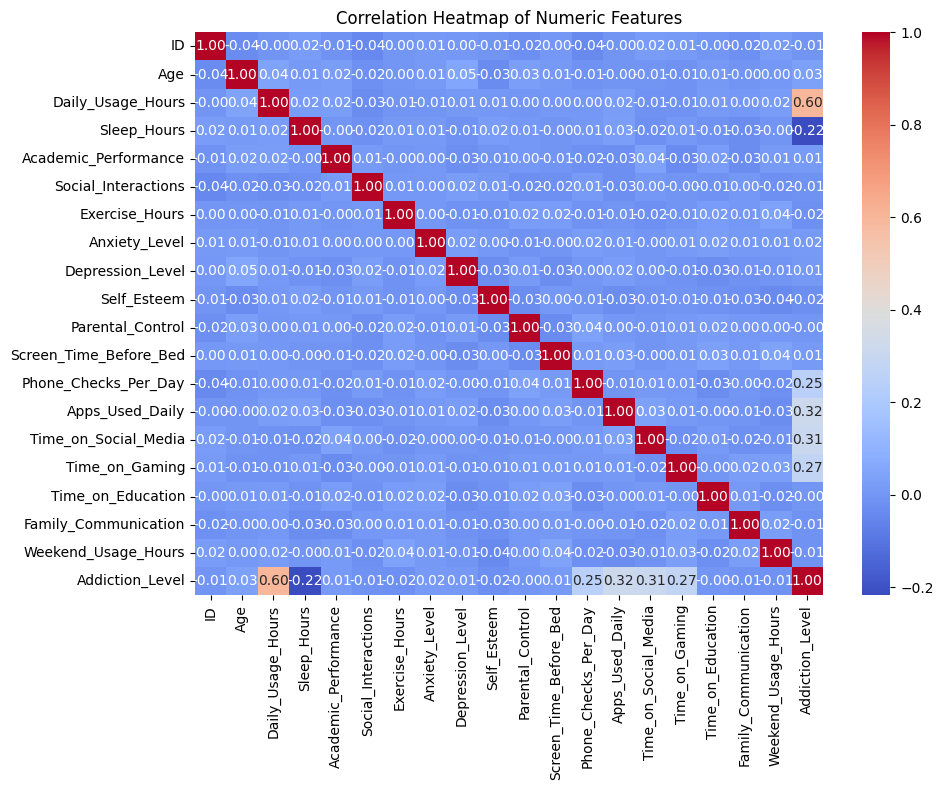

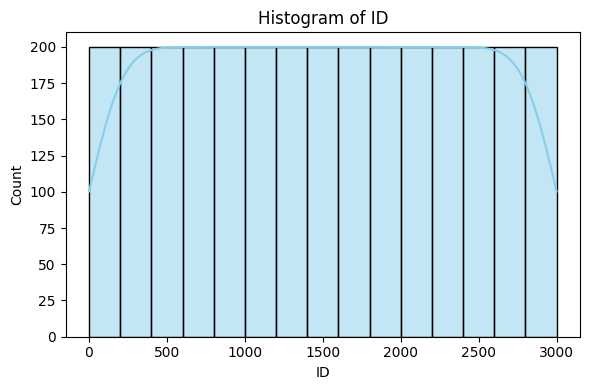

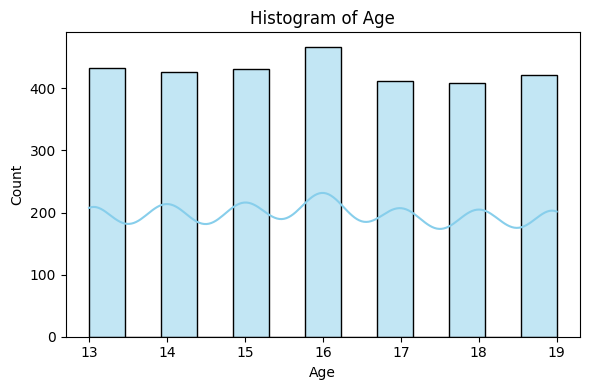

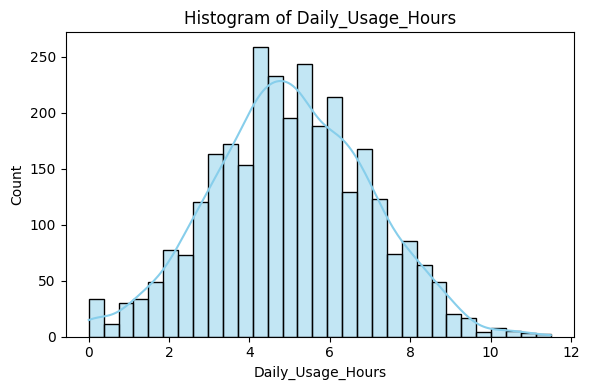

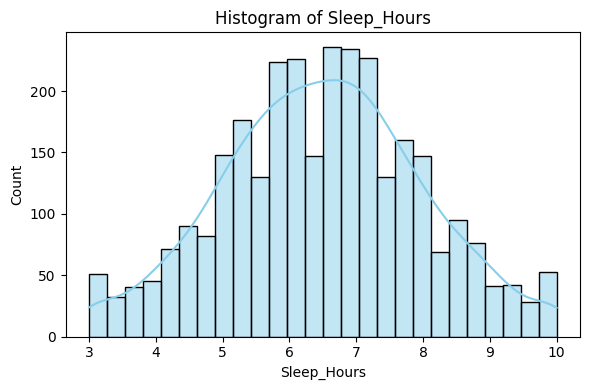

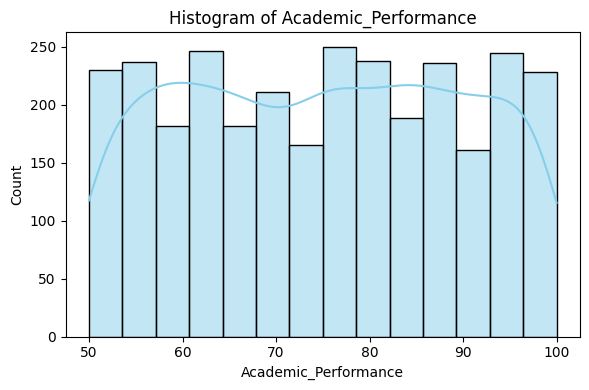

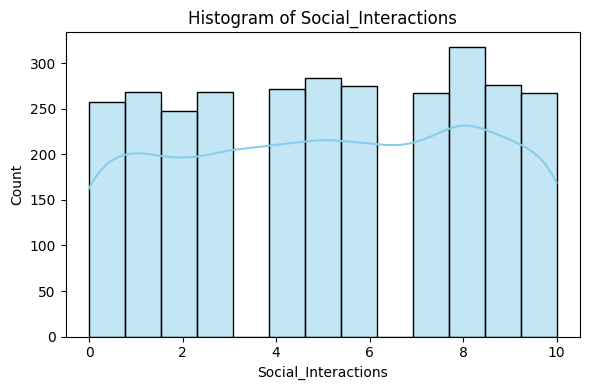

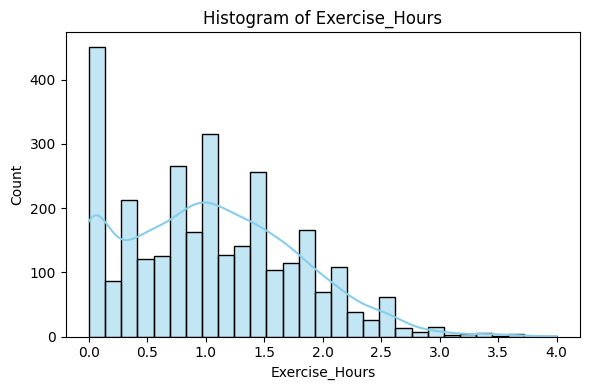

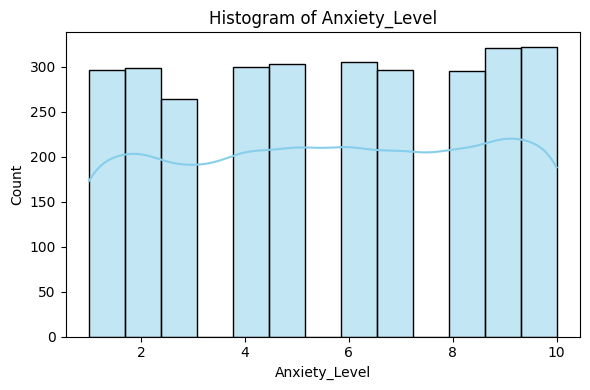

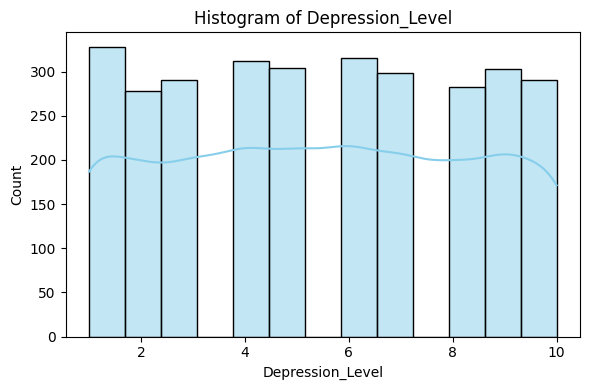

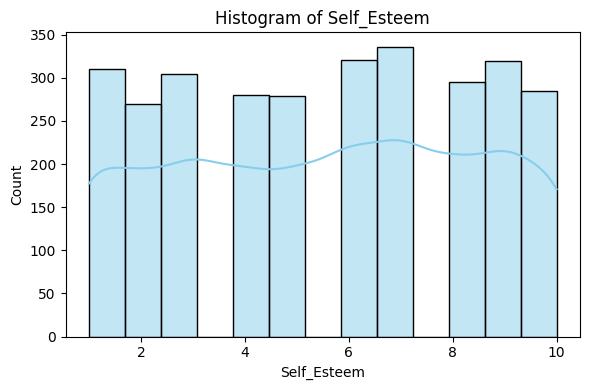

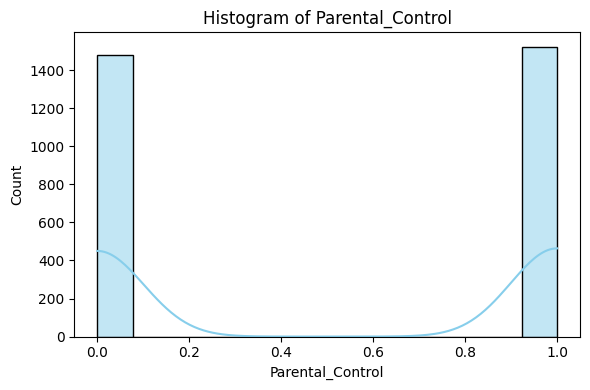

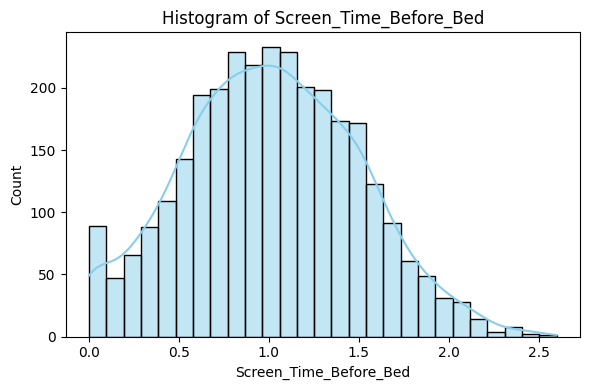

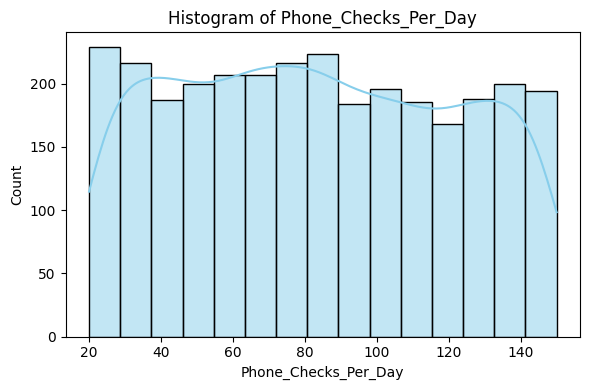

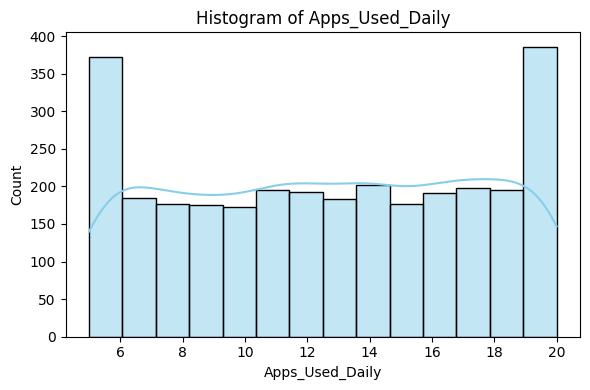

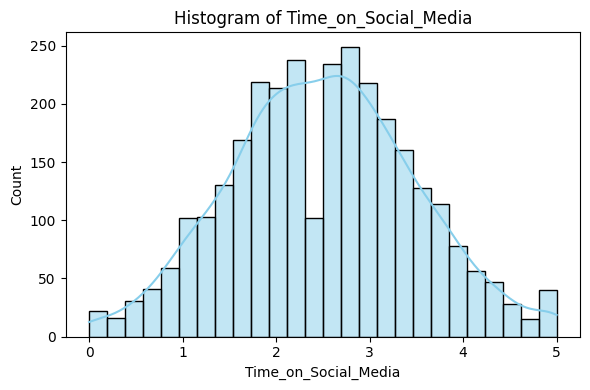

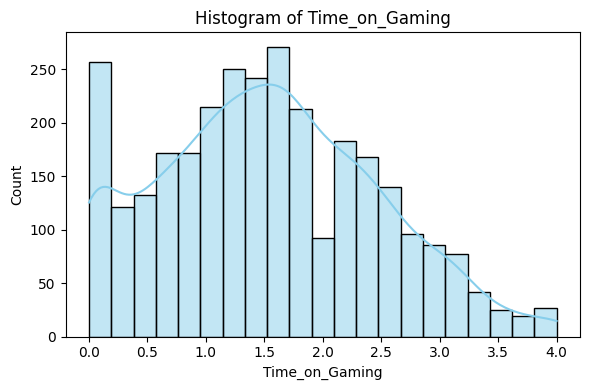

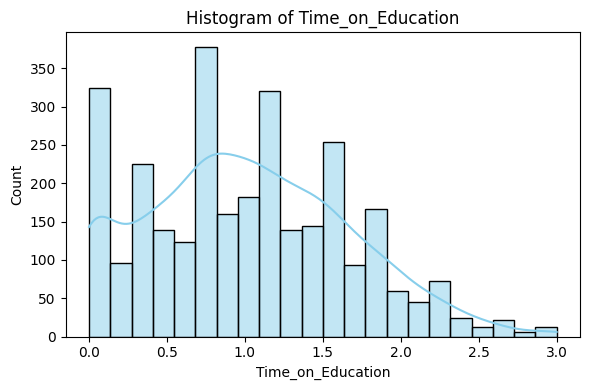

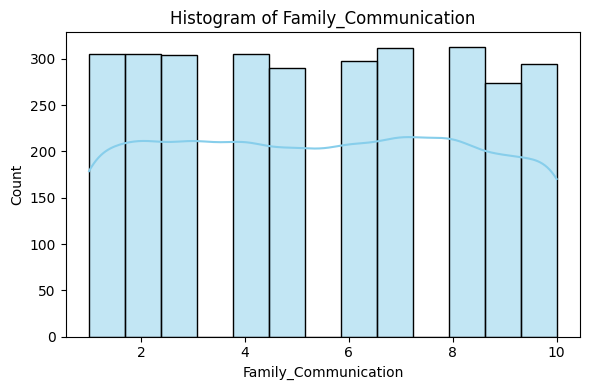

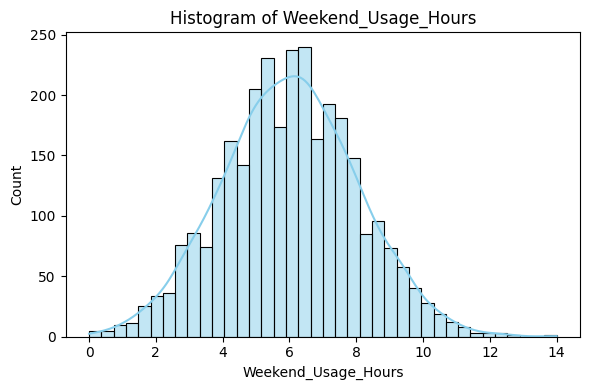

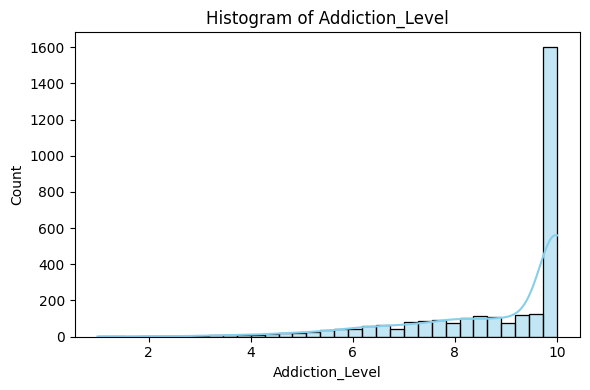

In [ ]:
# Quick descriptive statistics
print(df.describe())

# Select only numeric columns for further analyses
numeric_df = df.select_dtypes(include=[np.number])

# Plot a correlation heatmap if there are four or more numeric columns
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    corr = numeric_df.corr()
    sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print('Not enough numeric columns for a correlation heatmap.')

# Additionally, create some histograms to visualize distributions
numeric_cols = numeric_df.columns.tolist()
for col in numeric_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(numeric_df[col], kde=True, color='skyblue')
    plt.title(f'Histogram of {col}')
    plt.tight_layout()
    plt.show()

# Optional: Pair Plot (can be time consuming with many columns)
# Uncomment the following lines if you wish to see pairwise relationships
# sns.pairplot(numeric_df)
# plt.show()

In [ ]:
# Check for missing values
print('Missing values per column:')
print(df.isnull().sum())

# For the purpose of prediction, we drop identifier and string-based columns including 'Gender'
# These columns are: 'ID', 'Name', 'Location', 'School_Grade', 'Phone_Usage_Purpose', 'Gender'

# Creating a new dataframe for modeling purposes that contains only numeric columns
predictor_df = df.select_dtypes(include=[np.number]).copy()

# Display the columns used for the prediction model
print('Columns for prediction model:', predictor_df.columns.tolist())

Missing values per column:
ID                        0
Name                      0
Age                       0
Gender                    0
Location                  0
School_Grade              0
Daily_Usage_Hours         0
Sleep_Hours               0
Academic_Performance      0
Social_Interactions       0
Exercise_Hours            0
Anxiety_Level             0
Depression_Level          0
Self_Esteem               0
Parental_Control          0
Screen_Time_Before_Bed    0
Phone_Checks_Per_Day      0
Apps_Used_Daily           0
Time_on_Social_Media      0
Time_on_Gaming            0
Time_on_Education         0
Phone_Usage_Purpose       0
Family_Communication      0
Weekend_Usage_Hours       0
Addiction_Level           0
dtype: int64
Columns for prediction model: ['ID', 'Age', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per

In [ ]:
%pip install catboost -qq

['ID', 'Age', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Family_Communication', 'Weekend_Usage_Hours']
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'depth': 6, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
R² Score for predicting Addiction Level with CatBoost: 0.973


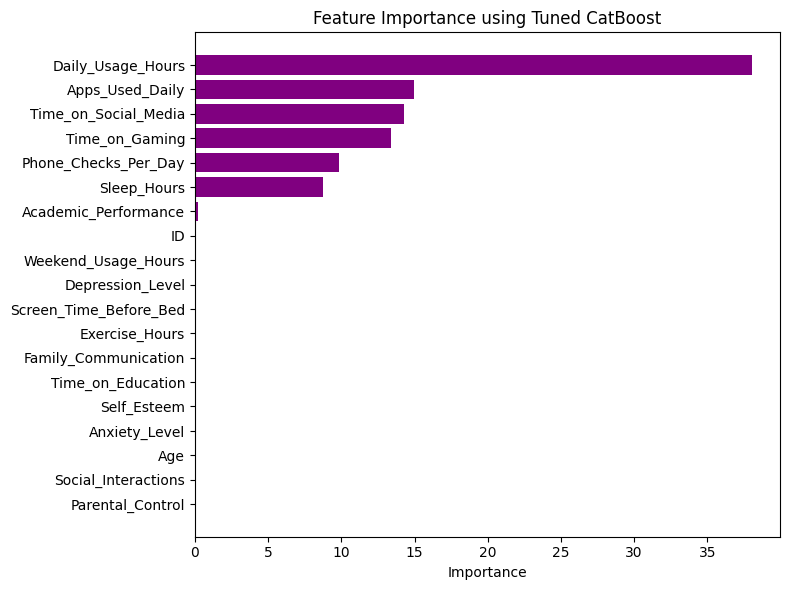

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score

# Define the target column
target = 'Addiction_Level'

# Ensure the target column exists
if target not in predictor_df.columns:
    raise ValueError(f"Target column '{target}' not found in the dataframe.")

# Define features and target
X = predictor_df.drop(columns=[target])
y = predictor_df[target]
print(X.columns.tolist())
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoost model (with silent training)
cat_model = CatBoostRegressor(verbose=0, random_state=42)

# GridSearchCV parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6, 8],
    'iterations': [100, 200],
    'l2_leaf_reg': [1, 3, 5]
}

# Grid search
grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid,
                           cv=5, scoring='r2', verbose=1, n_jobs=-1)

# Fit the model
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict and evaluate
predictions = best_model.predict(X_test)
accuracy = r2_score(y_test, predictions)
print(f'R² Score for predicting Addiction Level with CatBoost: {accuracy:.3f}')

# Feature importance plot
importances = best_model.get_feature_importance()
feature_names = X.columns

importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='purple')
plt.xlabel('Importance')
plt.title('Feature Importance using Tuned CatBoost')
plt.tight_layout()
plt.show()


In [ ]:
import joblib
joblib.dump(best_model, 'catboost_model.pkl')

['catboost_model.pkl']

Feature columns: ['ID', 'Age', 'Daily_Usage_Hours', 'Sleep_Hours', 'Academic_Performance', 'Social_Interactions', 'Exercise_Hours', 'Anxiety_Level', 'Depression_Level', 'Self_Esteem', 'Parental_Control', 'Screen_Time_Before_Bed', 'Phone_Checks_Per_Day', 'Apps_Used_Daily', 'Time_on_Social_Media', 'Time_on_Gaming', 'Time_on_Education', 'Family_Communication', 'Weekend_Usage_Hours']
Fitting 5 folds for each of 36 candidates, totalling 180 fits
Best Parameters: {'depth': 6, 'iterations': 200, 'l2_leaf_reg': 1, 'learning_rate': 0.1}
R² Score for predicting Addiction Level with CatBoost: 0.973
Binned Classification Accuracy: 0.99


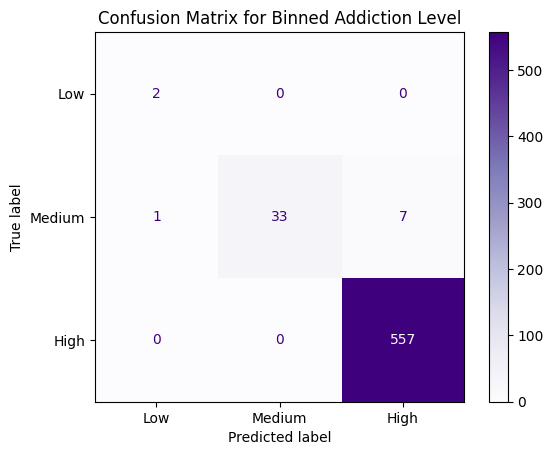

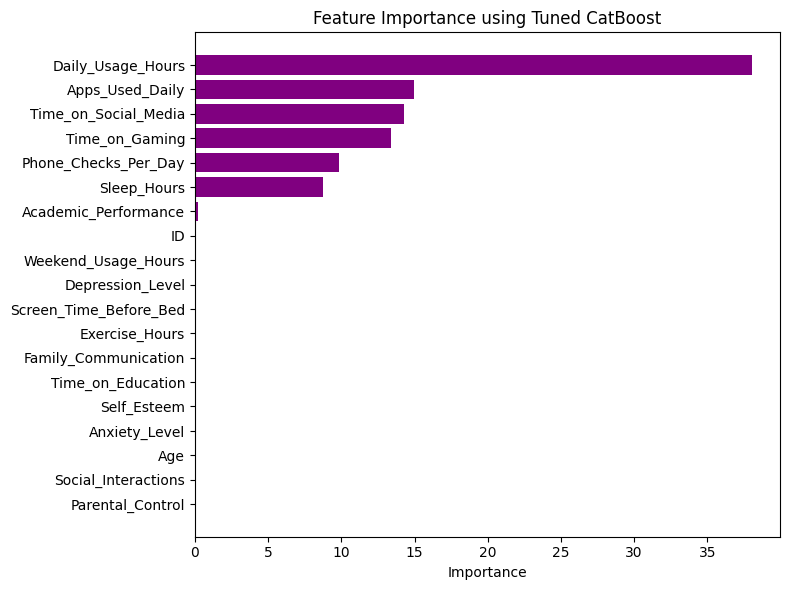

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from catboost import CatBoostRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import r2_score, accuracy_score, confusion_matrix, ConfusionMatrixDisplay

# Define the target column
target = 'Addiction_Level'

# Ensure the target column exists
if target not in predictor_df.columns:
    raise ValueError(f"Target column '{target}' not found in the dataframe.")

# Define features and target
X = predictor_df.drop(columns=[target])
y = predictor_df[target]

# Show feature columns
print("Feature columns:", X.columns.tolist())

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize CatBoost model (silent training)
cat_model = CatBoostRegressor(verbose=0, random_state=42)

# GridSearchCV parameter grid
param_grid = {
    'learning_rate': [0.01, 0.1],
    'depth': [4, 6, 8],
    'iterations': [100, 200],
    'l2_leaf_reg': [1, 3, 5]
}

# Grid search
grid_search = GridSearchCV(estimator=cat_model, param_grid=param_grid,
                           cv=5, scoring='r2', verbose=1, n_jobs=-1)
grid_search.fit(X_train, y_train)

# Best model
best_model = grid_search.best_estimator_
print("Best Parameters:", grid_search.best_params_)

# Predict and evaluate
predictions = best_model.predict(X_test)
r2 = r2_score(y_test, predictions)
print(f'R² Score for predicting Addiction Level with CatBoost: {r2:.3f}')

# ---------------- Classification from Regression ----------------

# Binning continuous values to categorical levels
bins = [0, 3, 6, 10]
labels = ['Low', 'Medium', 'High']

# Clip to range and apply binning
y_test_clipped = np.clip(y_test, 0, 10)
predictions_clipped = np.clip(predictions, 0, 10)

y_test_binned = pd.cut(y_test_clipped, bins=bins, labels=labels, include_lowest=True)
pred_binned = pd.cut(predictions_clipped, bins=bins, labels=labels, include_lowest=True)

# Drop NaNs if any (just in case)
mask = (~y_test_binned.isna()) & (~pred_binned.isna())
y_test_binned = y_test_binned[mask]
pred_binned = pred_binned[mask]

# Classification Accuracy
class_acc = accuracy_score(y_test_binned, pred_binned)
print(f'Binned Classification Accuracy: {class_acc:.2f}')

# Confusion matrix
cm = confusion_matrix(y_test_binned, pred_binned, labels=labels)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Purples')
plt.title('Confusion Matrix for Binned Addiction Level')
plt.show()

# ---------------- Feature Importance Plot ----------------

importances = best_model.get_feature_importance()
feature_names = X.columns

importances_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(importances_df['Feature'], importances_df['Importance'], color='purple')
plt.xlabel('Importance')
plt.title('Feature Importance using Tuned CatBoost')
plt.tight_layout()
plt.show()


In [ ]:
# Create a DataFrame with actual vs predicted values
results_df = X_test.copy()
results_df['Actual'] = y_test
results_df['Predicted'] = predictions

# Save to CSV
results_df.to_csv('addiction_predictions.csv', index=False)
print("Predictions saved to 'addiction_predictions.csv'")


Predictions saved to 'addiction_predictions.csv'
